In [4]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

# Загрузим тексты всех обращений

In [5]:
with open('..\\data\\raw\\dataset_link_data.pickle', 'rb') as f:
        dataset = pickle.load(f)

In [6]:
dataset

,link,data,file_name
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637


In [7]:
message_content = []
for name in dataset['file_name']:
    f = open("..\\data\\raw\\" + name + ".txt", "r")
    if f.mode == 'r':
        contents = f.read()
    contents = contents.replace('\n\n',' ')
    message_content.append(contents)

In [8]:
dataset['message_content'] = message_content

In [9]:
dataset

,link,data,file_name,message_content
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637,Уважаемые граждане России! Уважаемые депутаты ...


In [10]:
with open('..\\data\\interim\\dataset.pickle', 'wb') as f:
        pickle.dump(dataset, f)

# Посмотрим на длину каждого обращения

In [11]:
message_len = []
for message in dataset['message_content']:
    message_len.append(len(message))

In [12]:
message_len

[55672,
 71680,
 95192,
 57344,
 49159,
 52255,
 60321,
 71657,
 51447,
 54726,
 76503,
 65687]

C:\Users\bobkova-ao\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


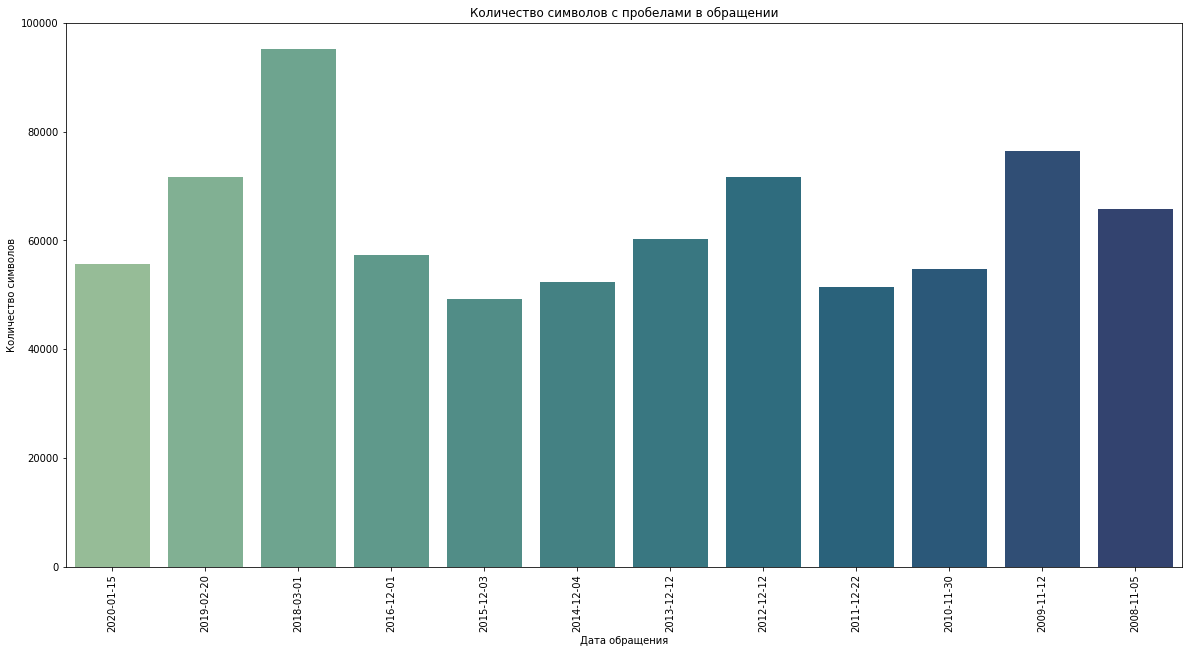

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(np.arange(12), message_len, palette='crest')
plt.xticks(X, dataset['data'])
plt.title('Количество символов с пробелами в обращении')
plt.xlabel('Дата обращения')
plt.ylabel('Количество символов')
plt.xticks(rotation=90);